# Tumor Purity Filter
- Goal: View distribution of tumor purity scores of samples based on comprehensive score from Aran, 2015
- Goal: establish a cut off for tumor purity

In [162]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

In [14]:
df = pd.read_csv("TCGA Data.csv")
col = df.head(20532)  
col

,Hugo_Symbol,Entrez_Gene_Id,TCGA-2V-A95S-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GW-01,TCGA-2Y-A9GX-01,TCGA-2Y-A9GY-01,...,TCGA-ZP-A9CZ-01,TCGA-ZP-A9D0-01,TCGA-ZP-A9D1-01,TCGA-ZP-A9D2-01,TCGA-ZP-A9D4-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CF-02,TCGA-ZS-A9CG-01
0,LOC100130426,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,UBE2Q2P3,100133144,1.5051,26.4120,0.0000,5.7222,11.4975,3.9234,0.0000,3.5137,...,3.8367,3.9575,2.2186,15.9098,1.0069,4.2224,0.0000,7.3398,8.3127,0.0000
2,UBE2Q2P3,100134869,3.7074,2.6663,4.4833,5.1216,5.4230,7.5709,8.4848,6.1275,...,4.8549,2.4775,4.8553,18.6608,6.9127,1.7881,8.7527,9.8897,11.4648,8.2262
3,LOC149767,10357,90.1124,71.0054,95.5122,61.6679,104.4670,99.4866,75.0909,45.1098,...,93.5837,62.9730,73.0161,65.1237,71.2827,64.5605,64.9891,105.8856,108.7824,57.1654
4,TIMM23,10431,1017.1038,639.2311,742.4344,1186.9807,878.1726,690.4215,680.6061,1199.2501,...,905.7892,1259.9743,942.7653,1008.7336,685.0516,1087.9038,1119.2560,544.4521,676.1434,917.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX,7791,3172.5037,5301.1336,3219.0092,3092.9899,2902.7073,8466.6667,3440.6061,3824.3171,...,2428.6823,1337.8378,4142.7653,4038.9374,2386.0840,4028.5500,4041.5755,1172.2950,611.8665,1963.3248
20527,FLJ10821,23140,890.0472,755.5446,860.7935,1339.6283,575.2961,992.3372,1148.4848,457.4183,...,1189.5080,1079.7941,1031.5113,568.0495,405.0346,635.6123,491.7943,431.4266,893.0779,629.9914
20528,ZZZ3,26009,510.1808,860.5224,523.6494,343.6655,665.8206,456.7050,643.0303,470.8088,...,581.7166,882.2394,540.1929,955.6041,791.4015,434.2600,577.1335,836.6644,924.5983,622.4507
20529,HUMRTVLH3,387590,3.9094,6.4071,14.3466,2.5024,2.5381,6.8966,4.2424,13.9261,...,3.1041,5.7915,7.0740,1.8195,3.3941,6.7618,0.0000,2.7567,3.7083,5.4841


In [74]:
df2 = pd.read_csv("Tumor Purity Scores (Aran, 2015).csv")
col2 = df2.head(9365)
col2

,Sample ID,Cancer type,CPE,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,TCGA-OR-A5J1-01A,ACC,0.9246,NaN,NaN,NaN
1,TCGA-OR-A5J2-01A,ACC,0.8985,NaN,NaN,NaN
2,TCGA-OR-A5J3-01A,ACC,0.9466,NaN,NaN,NaN
3,TCGA-OR-A5J4-01A,ACC,0.8660,NaN,NaN,NaN
4,TCGA-OR-A5J5-01A,ACC,0.9780,NaN,NaN,NaN
...,...,...,...,...,...,...
9359,TCGA-NF-A5CP-01A,UCS,0.7320,NaN,NaN,NaN
9360,TCGA-NG-A4VU-01A,UCS,0.8695,NaN,NaN,NaN
9361,TCGA-NG-A4VW-01A,UCS,0.7913,NaN,NaN,NaN
9362,TCGA-QM-A5NM-01A,UCS,0.9602,NaN,NaN,NaN


In [105]:
samples_list = list(df2['Sample ID'])
first = df2.loc[9359]

0.732

## Adding "A" Character for "A" Vials of TCGA Samples

In [99]:
clmn = list(col)

clmn1 = [item + 'A' for item in clmn]

## Retrieving Indeces

In [153]:
container = []
indeces = []

for i in clmn1:     
    if i in samples_list:
        container.append(i)
        indeces.append(samples_list.index(i))

## Retrieving Tumor Purity Scores Based on Index

In [208]:
temp = []

for k, item in enumerate(container):
    cpe = df2.loc[indeces[k]]
    temp.append(cpe["CPE"])

numpy.float64

## Combining Data into new Dataframe (filtered_df3)

- Note: .notnull() in line 3 was used to remove any "NaN" values in data set

In [214]:
d = {'Sample':container,'Purity':temp}
df3 = pd.DataFrame(d)
filtered_df3 = df3[df3['Purity'].notnull()]
print(filtered_df3)

               Sample  Purity
0    TCGA-2V-A95S-01A  0.6126
1    TCGA-2Y-A9GS-01A  0.5915
2    TCGA-2Y-A9GT-01A  0.6718
3    TCGA-2Y-A9GU-01A  0.9342
4    TCGA-2Y-A9GV-01A  0.7535
..                ...     ...
365  TCGA-ZP-A9D4-01A  0.7913
366  TCGA-ZS-A9CD-01A  0.6152
367  TCGA-ZS-A9CE-01A  0.7466
368  TCGA-ZS-A9CF-01A  0.8116
370  TCGA-ZS-A9CG-01A  0.8876

[369 rows x 2 columns]


## Creating a Sorted Dictionary for Visualization

- Sorted dictionary code is similar to that used in the TP53 and CTNNB1 filter files

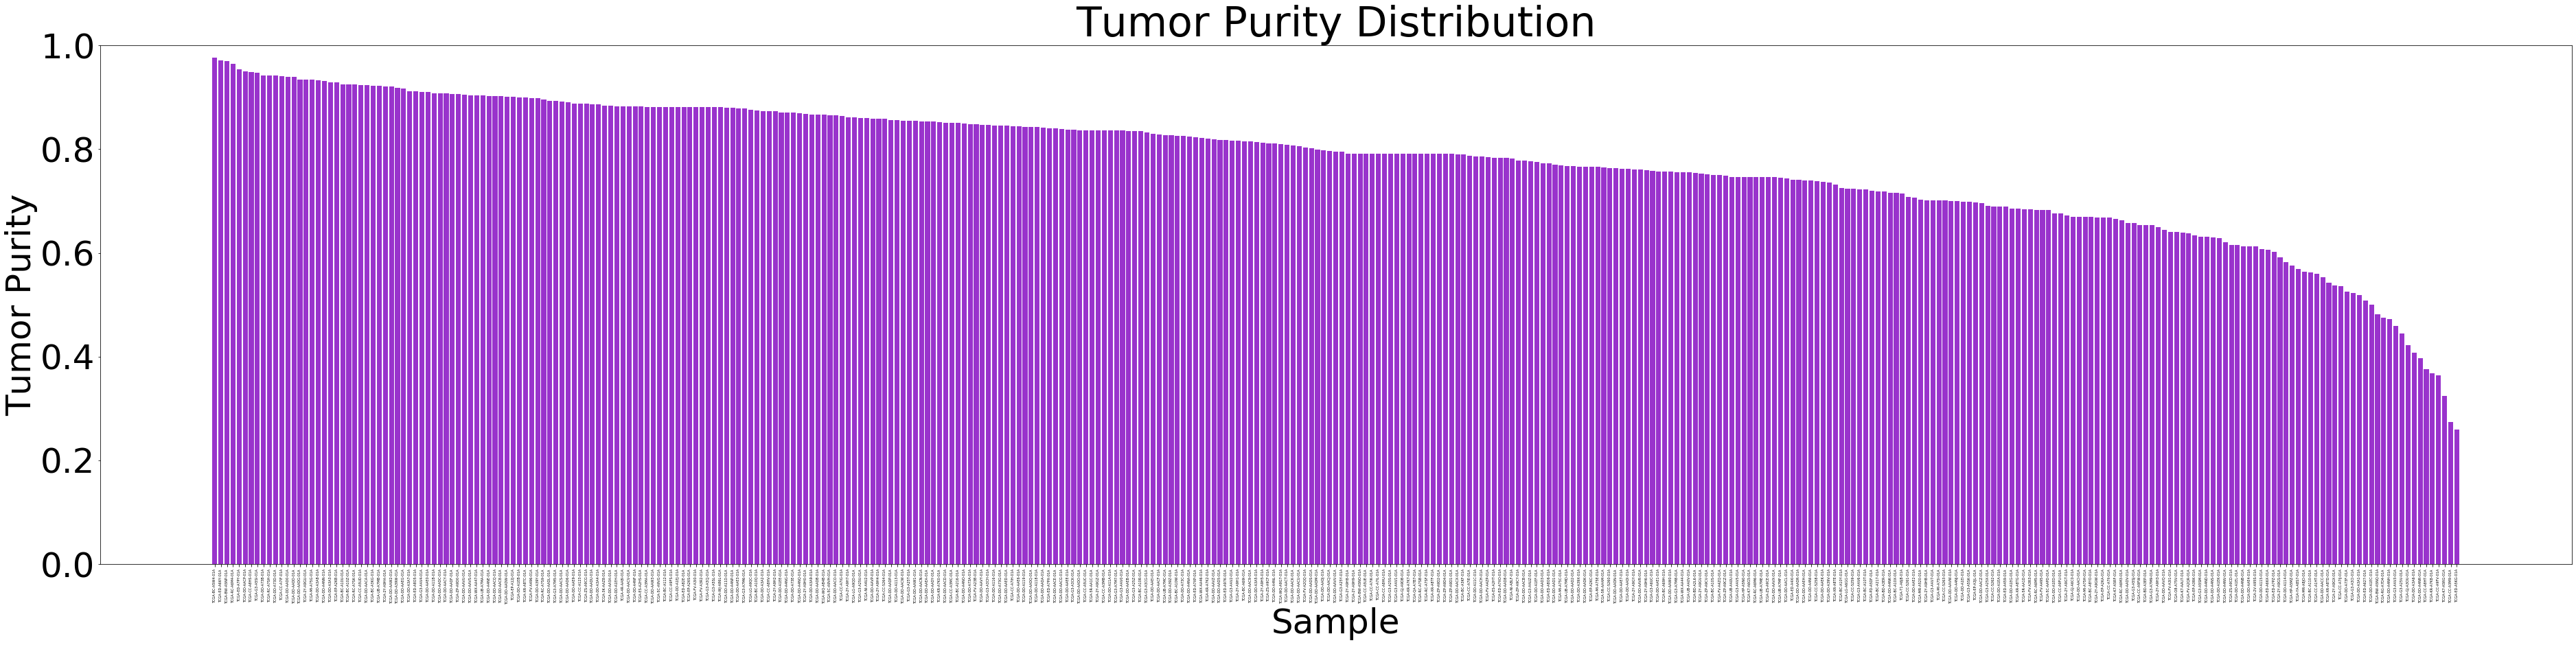

In [238]:
clmn3 = list(filtered_df3.Sample)
purity = list(filtered_df3.Purity)

dct = {} 
for key in clmn3: 
    for value in purity: 
        if value != np.float64(np.nan):
            dct[key] = value
            purity.remove(value) 
            break  

sorted_dct = dict(sorted(dct.items(), key=operator.itemgetter(1),reverse=True))


samples = list(sorted_dct.keys())
purity_scores = list(sorted_dct.values())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)

plt.bar(samples, purity_scores, color=(0.6, 0.2, 0.8, 1))


plt.title('Tumor Purity Distribution')
plt.xlabel('Sample')
plt.ylabel('Tumor Purity')
plt.ylim(0, 1)

fig.set_size_inches(50, 10.5)
plt.rcParams.update({'font.size': 50})
plt.rc('xtick', labelsize=5)

plt.show()


## Tumor Purity Cutoff Criteria
- Can change this to evaluate where to cutoff tumor purity for downstream analysis

In [ ]:
df4 = df3[df3.Purity <= 0.75]